In [3]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# years = [2023,2022]
# aqi_files = {
#     2023:"/Users/shishir/Downloads/cs667-project/AQI DATA/AQI_daily_city_level_kanpur_2023_kanpur_2023.xlsx",
#     2022: "/Users/shishir/Downloads/cs667-project/AQI DATA/AQI_daily_city_level_kanpur_2022_kanpur_2022.xlsx",
# }
# pollutant_files = {
#     2023:"/Users/shishir/Downloads/cs667-project/POLLUTANT DATA/Raw_data_1Day_2023_site_5500_FTI_Kidwai_Nagar_Kanpur_UPPCB_1Day.csv",
#     2022: "/Users/shishir/Downloads/cs667-project/POLLUTANT DATA/Raw_data_1Day_2022_site_5500_FTI_Kidwai_Nagar_Kanpur_UPPCB_1Day.csv",
  
# }
# merged_yearly_data = []

# month_mapping = {
#     "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, 
#     "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
# }
# for year in years:
    
#     aqi_data = pd.read_excel(aqi_files[year])
#     pollutant_data = pd.read_csv(pollutant_files[year])

#     pollutant_data['Timestamp'] = pd.to_datetime(pollutant_data['Timestamp'])
#     pollutant_data.set_index('Timestamp', inplace=True)
#     pollutant_data_interpolated = pollutant_data.interpolate(method='time')


#     aqi_data = aqi_data.rename(columns={"Date": "Day"})
#     aqi_long = pd.melt(aqi_data, id_vars=['Day'], var_name='Month', value_name='AQI')
#     aqi_long['Month'] = aqi_long['Month'].map(month_mapping)
#     aqi_long['Year'] = year

#     aqi_long = aqi_long.dropna(subset=['Day', 'Month', 'Year'])  
#     aqi_long['Day'] = pd.to_numeric(aqi_long['Day'], errors='coerce')
#     aqi_long['Month'] = pd.to_numeric(aqi_long['Month'], errors='coerce')
#     aqi_long['Year'] = pd.to_numeric(aqi_long['Year'], errors='coerce')
#     aqi_long = aqi_long.dropna(subset=['Day', 'Month', 'Year'])  

#     aqi_long['Date'] = pd.to_datetime(aqi_long[['Year', 'Month', 'Day']], errors='coerce')
#     aqi_long = aqi_long.dropna(subset=['Date']) 
#     aqi_long.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)


#     merged_data = pd.merge(daily_pollutant_data, aqi_long, left_on='Timestamp', right_on='Date')
#     merged_data.drop(columns=['Date'], inplace=True)

#     merged_yearly_data.append(merged_data)

# combined_data = pd.concat(merged_yearly_data, ignore_index=True)
# combined_data=combined_data.fillna(0, inplace=False)

# columns_to_keep = ['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)','NH3 (µg/m³)','Benzene (µg/m³)','AT (°C)','RH (%)' , 'AQI']

# filtered_data = combined_data[columns_to_keep]
# print(filtered_data.head())
# filtered_data.to_csv('/Users/shishir/Downloads/cs667-project/filtered_data.csv', index=False)




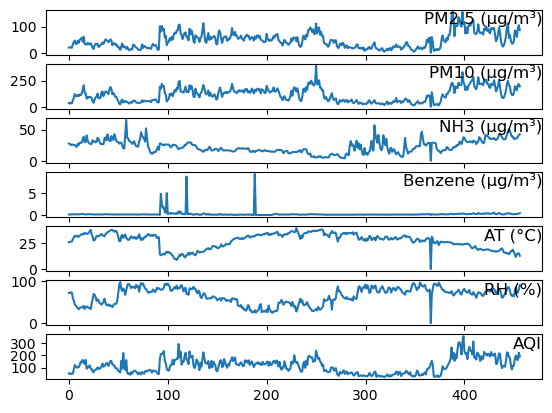

In [4]:
from pandas import read_csv
from matplotlib import pyplot

dataset = read_csv('filtered_data.csv', header=0, index_col=0)
values = dataset.values

groups = [0, 1, 2, 3, 4, 5, 6]
i = 1

pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing  import MinMaxScaler
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [6]:

data =pd.read_csv('/Users/shishir/Downloads/cs667-project/filtered_data.csv')

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.sort_values('Timestamp').set_index('Timestamp')

features = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)','NH3 (µg/m³)','Benzene (µg/m³)','AT (°C)','RH (%)' ]
target=['AQI']
scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(data[features])

scaler_target = MinMaxScaler()
scaled_target = scaler_target.fit_transform(data[target])

scaled_features_df = pd.DataFrame(scaled_features, columns=features, index=data.index)
scaled_target_df = pd.DataFrame(scaled_target, columns=target, index=data.index)

scaled_data = pd.concat([scaled_features_df, scaled_target_df], axis=1)
print(scaled_data.head())
scaled_data.to_csv('/Users/shishir/Downloads/cs667-project/scaled_data.csv', index=False)


def create_sequences(data, target, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i].values)  
        y.append(target[i])  
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features_df, scaled_target_df['AQI'].values)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

            PM2.5 (µg/m³)  PM10 (µg/m³)  NH3 (µg/m³)  Benzene (µg/m³)  \
Timestamp                                                               
2022-01-01       0.645587      0.491307     0.427289         0.001062   
2022-01-02       0.515857      0.439478     0.421930         0.516985   
2022-01-03       0.651203      0.561135     0.405549         0.260085   
2022-01-04       0.543935      0.491281     0.383350         0.180467   
2022-01-05       0.584264      0.507057     0.382432         0.181529   

             AT (°C)    RH (%)       AQI  
Timestamp                                 
2022-01-01  0.357626  0.829463  0.448071  
2022-01-02  0.336339  0.812799  0.566766  
2022-01-03  0.344853  0.816605  0.572700  
2022-01-04  0.368645  0.825657  0.572700  
2022-01-05  0.374906  0.868858  0.637982  
Shape of X: (427, 30, 6)
Shape of y: (427,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(341, 30, 6) (341,)
(86, 30, 6) (86,)


In [8]:
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, 
                    callbacks=[early_stopping], verbose=1)


Epoch 1/100


/opt/anaconda3/envs/my_new_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0512 - val_loss: 0.0158
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0181 - val_loss: 0.0156
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0169 - val_loss: 0.0140
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0164 - val_loss: 0.0137
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0168 - val_loss: 0.0133
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0113 - val_loss: 0.0126
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0145 - val_loss: 0.0128
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0126 - val_loss: 0.0124
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0131 - val_loss: 0.0118
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0125 - val_loss: 0.0127
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0150 - val_loss: 0.0114
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error
from numpy import concatenate

predictions = model.predict(X_test)


y_test_reshaped = y_test.reshape(-1, 1)
predictions_reshaped = predictions.reshape(-1, 1)


y_test_unscaled = scaler_target.inverse_transform(y_test_reshaped).flatten()
predictions_unscaled = scaler_target.inverse_transform(predictions_reshaped).flatten()
rmse = np.sqrt(mean_squared_error(y_test_unscaled, predictions_unscaled))
print(f"RMSE: {rmse}")



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
RMSE: 21.562687434946664


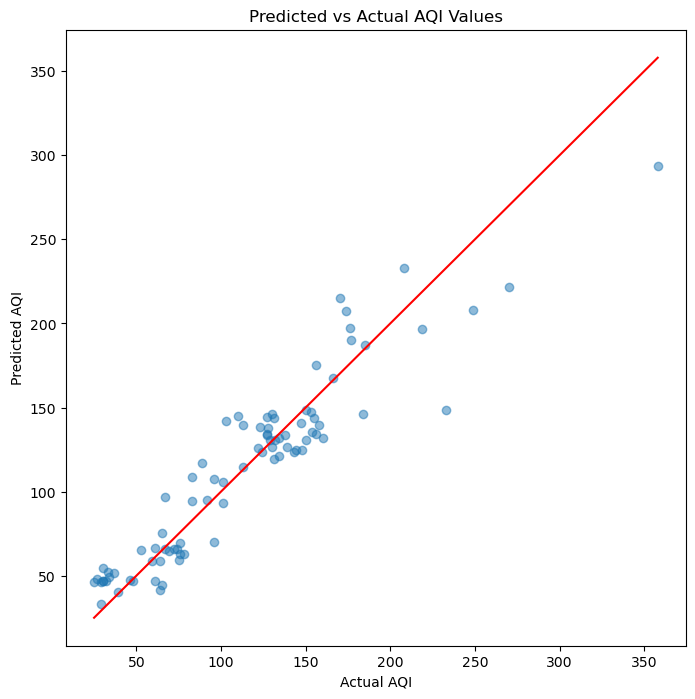

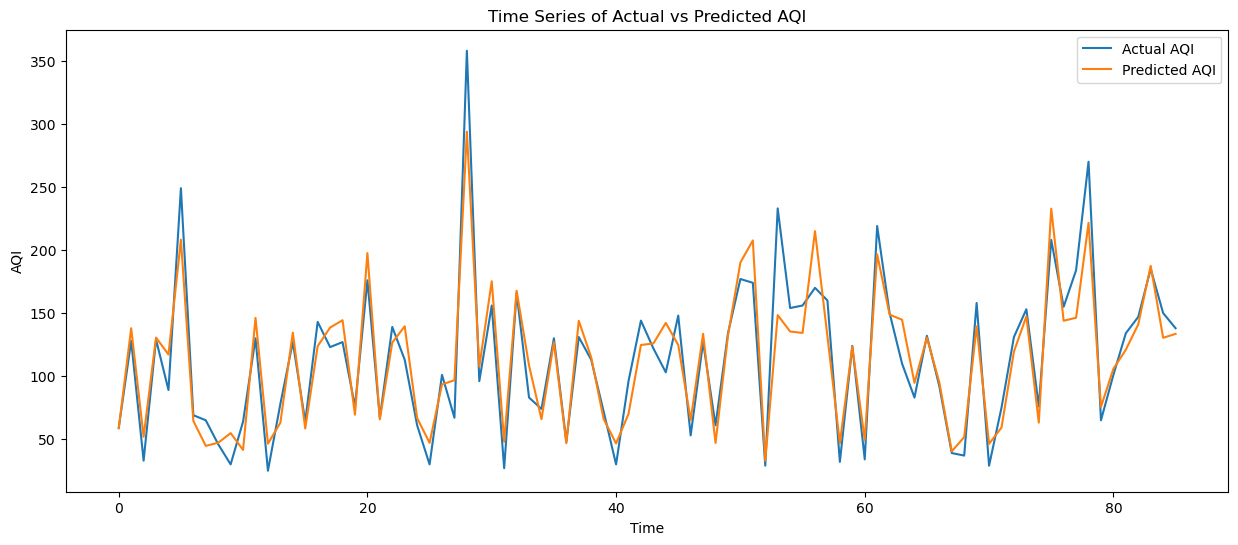

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test_unscaled, predictions_unscaled, alpha=0.5)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Actual AQI Values')
plt.plot([min(y_test_unscaled), max(y_test_unscaled)], [min(y_test_unscaled), max(y_test_unscaled)], color='red')  # Diagonal line
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(y_test_unscaled, label='Actual AQI')
plt.plot(predictions_unscaled, label='Predicted AQI')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.title('Time Series of Actual vs Predicted AQI')
plt.legend()
plt.show()


In [11]:
model.save('/Users/shishir/Downloads/cs667-project/aqi_prediction_model.keras')


In [12]:
import tensorflow as tf

model = tf.keras.models.load_model('/Users/shishir/Downloads/cs667-project/aqi_prediction_model.keras')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False

tflite_model = converter.convert()

with open('/Users/shishir/Downloads/cs667-project/aqi_prediction_model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: /var/folders/gy/hf59191j2hjdzmj4rv5264sr0000gn/T/tmpwwqx4iph/assets


INFO:tensorflow:Assets written to: /var/folders/gy/hf59191j2hjdzmj4rv5264sr0000gn/T/tmpwwqx4iph/assets


Saved artifact at '/var/folders/gy/hf59191j2hjdzmj4rv5264sr0000gn/T/tmpwwqx4iph'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30, 6), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  12974888464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12974885200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12974889424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12974886928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12974890384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12974889040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12974883088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12974886544: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1731778496.734821 1724344 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1731778496.735598 1724344 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2024-11-16 23:04:56.736234: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/gy/hf59191j2hjdzmj4rv5264sr0000gn/T/tmpwwqx4iph
2024-11-16 23:04:56.736827: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-11-16 23:04:56.736832: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/gy/hf59191j2hjdzmj4rv5264sr0000gn/T/tmpwwqx4iph
2024-11-16 23:04:56.744146: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-11-16 23:04:56.745086: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-11-16 23:04:56.789349: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at 